In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("mushroom.data")
print(df.shape)
df.head(5)

(8123, 23)


,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [ ]:
data = df.values
X = data[:,1:-1]
y = data[:,0].ravel()
print(X[:3])
print(y[:3])

[['x' 's' 'y' 't' 'a' 'f' 'c' 'b' 'k' 'e' 'c' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'p' 'n' 'n']
 ['b' 's' 'w' 't' 'l' 'f' 'c' 'b' 'n' 'e' 'c' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'p' 'n' 'n']
 ['x' 'y' 'w' 't' 'p' 'f' 'c' 'n' 'n' 'e' 'e' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'p' 'k' 's']]
['e' 'e' 'p']


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
(r, c) = X.shape
for i in range(0, c):
    X[:,i] =  LE.fit_transform(X[:,i])
y = LE.fit_transform(y)
print(X)
print(y)

[[5 2 9 ... 4 3 2]
 [0 2 8 ... 4 3 2]
 [5 3 8 ... 4 2 3]
 ...
 [2 2 4 ... 4 0 1]
 [3 3 4 ... 0 7 4]
 [5 2 4 ... 4 4 1]]
[0 0 1 ... 0 1 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6498, 21) (6498,)
(1625, 21) (1625,)


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('y_pred:\n', y_predict)
print('y_true:\n', y_test)

#Tinh do chinh xac
acc_score = metrics.accuracy_score(y_predict,y_test)
print('acurracy:\n', acc_score)

y_pred:
 [0 1 1 ... 0 0 0]
y_true:
 [0 1 1 ... 0 0 0]
acurracy:
 0.9981538461538462


In [ ]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np 

clf = MultinomialNB()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('y_test',y_test)
print('y_pred',y_pred)

proba = clf.predict_proba(X_test)
print('proba',proba)


acc_score_nb = metrics.accuracy_score(y_pred,y_test)
print('acurracy:\n', acc_score_nb)

y_test [0 1 1 ... 0 0 0]
y_pred [0 1 0 ... 1 1 0]
proba [[9.98818021e-01 1.18197907e-03]
 [9.20187360e-05 9.99907981e-01]
 [5.71047654e-01 4.28952346e-01]
 ...
 [3.88104104e-01 6.11895896e-01]
 [8.06093087e-02 9.19390691e-01]
 [9.98878814e-01 1.12118591e-03]]
acurracy:
 0.7926153846153846


In [ ]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', gamma=0.01, C=100.)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)
print('predict:\n', y_pred_svm)
print('y_true:\n', y_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm,y_test)
print('acurracy:\n', acc_score_svm)

predict:
 [0 1 1 ... 0 1 0]
y_true:
 [0 1 1 ... 0 0 0]
acurracy:
 0.9587692307692308


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred_Logistic = model.predict(X_test)
print(y_pred_Logistic)

acc_score_logistic = metrics.accuracy_score(y_pred_Logistic, y_test)
print('acurracy:\n', acc_score_logistic)

[0 1 1 ... 0 1 0]
acurracy:
 0.9575384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,),  alpha=0.0001,
                     verbose=10,  random_state=21, tol=0.000000001)

clf.fit(X_train, y_train)
scores = model.predict(X_test)

print(scores)
acc_score_mlp = metrics.accuracy_score(scores, y_test)
print('acurracy:\n', acc_score_mlp)

Iteration 1, loss = 0.50836303
Iteration 2, loss = 0.32907039
Iteration 3, loss = 0.27318949
Iteration 4, loss = 0.23564781
Iteration 5, loss = 0.20590429
Iteration 6, loss = 0.18005757
Iteration 7, loss = 0.15783110
Iteration 8, loss = 0.13907835
Iteration 9, loss = 0.12280267
Iteration 10, loss = 0.10943094
Iteration 11, loss = 0.09772985
Iteration 12, loss = 0.08646885
Iteration 13, loss = 0.07884844
Iteration 14, loss = 0.06889947
Iteration 15, loss = 0.06234478
Iteration 16, loss = 0.05544652
Iteration 17, loss = 0.05157610
Iteration 18, loss = 0.04753809
Iteration 19, loss = 0.04297531
Iteration 20, loss = 0.03830823
Iteration 21, loss = 0.03548744
Iteration 22, loss = 0.03293195
Iteration 23, loss = 0.02966449
Iteration 24, loss = 0.02759519
Iteration 25, loss = 0.02523490
Iteration 26, loss = 0.02430387
Iteration 27, loss = 0.02195378
Iteration 28, loss = 0.02033289
Iteration 29, loss = 0.01900646
Iteration 30, loss = 0.01755318
Iteration 31, loss = 0.01653366
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0 0 0 ... 0 0 0]
Epoch 00016: early stopping
Train: 0.939, Test: 0.954


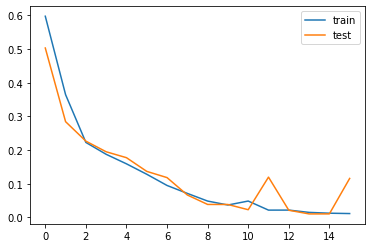

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras.utils
import tensorflow
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

X = np.asarray(X).astype('float32')
# y = np.asarray(ohe_labels).astype('float32')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=4)

print(y_train)

model = Sequential()
model.add(Dense(350, input_dim=21, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer="sgd" ,metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), epochs=200, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
